In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.font_manager import FontProperties

In [2]:
%matplotlib inline
#導入ADF函數和numpy包
from arch.unitroot import ADF
import numpy as np
import re
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
import matplotlib 
matplotlib.matplotlib_fname()

'c:\\users\\a9025\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [4]:
#find  matplotlib default font
from matplotlib.font_manager import findfont, FontProperties  
findfont(FontProperties(family=FontProperties().get_family())) 

'c:\\users\\a9025\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'

In [5]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif']

['DejaVu Sans',
 'Bitstream Vera Sans',
 'Computer Modern Sans Serif',
 'Lucida Grande',
 'Verdana',
 'Geneva',
 'Lucid',
 'Arial',
 'Helvetica',
 'Avant Garde',
 'sans-serif']

In [6]:
from matplotlib.font_manager import FontProperties

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [7]:
# 昆盈
KYE=pd.read_csv('2365.csv',sep=',',index_col='Date')
KYE.index=pd.to_datetime(KYE.index)

In [8]:
#仲琦
Hitron=pd.read_csv('2419.csv',sep=',',index_col='Date')
Hitron.index=pd.to_datetime(Hitron.index)

In [9]:
# 台灣50指數成分股
tw50=pd.read_csv('tw50.csv',sep=',',index_col='Date')
tw50.index=pd.to_datetime(tw50.index)

In [ ]:
# 定義配對形成期
formStart='2014-01-01'
formEnd='2015-01-01'

In [ ]:
KYEf=KYE[formStart:formEnd]
Hitronf=Hitron[formStart:formEnd]
KYEf.head()

,Close,Open,High,Low,Volume,ROI
Date,,,,,,
2014-01-02,10.47,10.47,10.52,10.35,733,0.4098
2014-01-03,10.56,10.52,10.69,10.39,2180,0.8163
2014-01-06,10.56,10.60,10.64,10.43,729,0.0000
2014-01-07,10.60,10.56,10.77,10.56,1879,0.4049
2014-01-08,10.64,10.69,10.77,10.60,1760,0.4032


In [ ]:
Hitronf.head()

,Close,Open,High,Low,Volume,ROI
Date,,,,,,
2014-01-02,14.40,14.04,14.49,14.04,2612,2.5806
2014-01-03,14.22,14.13,14.35,14.13,1138,-1.2579
2014-01-06,14.04,14.22,14.35,13.99,1372,-1.2739
2014-01-07,14.31,14.04,14.40,14.04,2741,1.9355
2014-01-08,14.40,14.40,14.67,14.31,3891,0.6329


In [ ]:
len(Hitronf)

248

In [ ]:
#最小距離法
def SSD(priceX,priceY):
    if priceX is None or priceY is None:
        print('缺少價格序列.')
    standardX=priceX/priceX[0]
    standardY=priceY/priceY[0]
    SSD=np.sum((standardX-standardY)**2)
    return(SSD) 

In [ ]:
#計算仲琦與昆盈的標準化價格的距離
KYEf =  pairf['昆盈']  
Hitronf = pairf['仲琦科技'] 
dis=SSD(KYEf,Hitronf)
dis

1.3364442848421572

In [ ]:
#用ADF檢定
KYEflog=np.log(KYEf)
adfA=ADF(KYEflog)
print(adfA.summary().as_text())
#說明昆盈對數序列是不定態

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.738
P-value                         0.412
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
retA=KYEflog.diff()[1:]
adfretA=ADF(retA)
print(adfretA.summary().as_text())
# 昆盈差分之後就定態了

   Augmented Dickey-Fuller Results   
Test Statistic                -14.404
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
Hitronflog=np.log(Hitronf)
adfB=ADF(Hitronflog)
print(adfB.summary().as_text())
#仲琦也是相同的情形！

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.715
P-value                         0.423
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
retB=Hitronflog.diff()[1:]
adfretB=ADF(retB)
print(adfretB.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -14.824
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Text(0.5, 1.0, '昆盈與仲琦科技的對數價格時序圖')

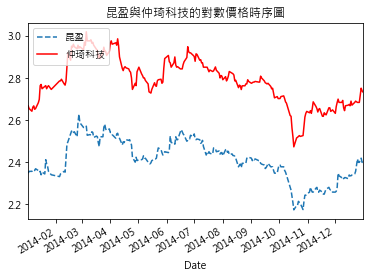

In [ ]:
KYEflog.plot(label='昆盈',style='--')
Hitronflog.plot(label='仲琦科技',style='r-')
plt.legend(loc='upper left')
plt.title('昆盈與仲琦科技的對數價格時序圖') 

Text(0.5, 1.0, '昆盈與仲琦科技的對數價格差分(收益率)時序圖')

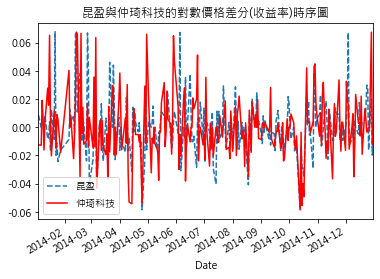

In [ ]:
retA.plot(label='昆盈',style='--')
retB.plot(label='仲琦科技',style='r-')
plt.legend(loc='lower left')
plt.title('昆盈與仲琦科技的對數價格差分(收益率)時序圖') 
# 可以看出來穩態

In [ ]:
#回歸分析 
#因變數是昆盈(A)股票的對數價格 
#自變數是仲琦科技(B)股票的對數價格
model=sm.OLS(KYEflog,sm.add_constant(Hitronflog))
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     昆盈   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1948.
Date:                Thu, 20 Jun 2019   Prob (F-statistic):          7.05e-119
Time:                        05:58:31   Log-Likelihood:                 498.40
No. Observations:                 248   AIC:                            -992.8
Df Residuals:                     246   BIC:                            -985.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1489      0.051      2.900      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
alpha=results.params[0]  
beta=results.params[1]
print(alpha,beta)

0.14885693760867308 0.8137547011721911


In [ ]:
spread=KYEflog-beta*Hitronflog-alpha
spread.head()

Date
2014-01-02    0.029188
2014-01-03    0.047983
2014-01-06    0.058349
2014-01-07    0.046629
2014-01-08    0.045294
dtype: float64

Text(0.5, 1.0, '昆盈與仲琦科技的價差序列')

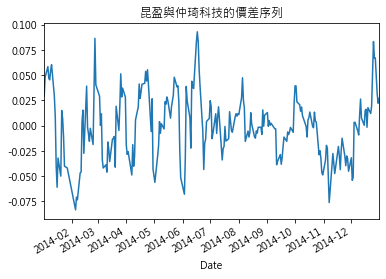

In [ ]:
spread.plot()
plt.title('昆盈與仲琦科技的價差序列') 

In [ ]:
adfSpread=ADF(spread, trend='nc') 
print(adfSpread.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -5.647
P-value                         0.000
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
#最小距離法交易策略
standardA= KYEf/KYEf[0]
standardB= Hitronf/Hitronf[0]
SSD_pair=standardA-standardB
SSD_pair.head() 

Date
2014-01-02    0.000000
2014-01-03    0.021096
2014-01-06    0.033596
2014-01-07    0.018666
2014-01-08    0.016237
dtype: float64

In [ ]:
meanSSD_pair=np.mean(SSD_pair)
sdSSD_pair=np.std(SSD_pair)
thresholdUp=meanSSD_pair+1.5*sdSSD_pair
thresholdDown=meanSSD_pair-1.5*sdSSD_pair
print(thresholdUp,thresholdDown)

0.011419292055559284 -0.12609645145106732


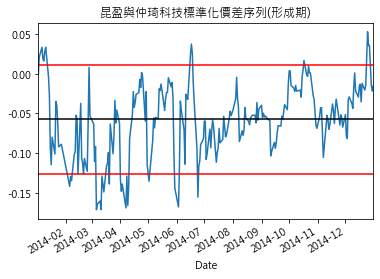

In [ ]:
SSD_pair.plot()
plt.axhline(y=meanSSD_pair,color='black')
plt.axhline(y=thresholdUp,color='red')
plt.axhline(y=thresholdDown,color='red') 
plt.title("昆盈與仲琦科技標準化價差序列(形成期)") 
plt.show()


In [ ]:
tradStart='2015-01-01'
tradEnd='2015-06-30'

In [ ]:
KYEt=KYE[tradStart:tradEnd].Close
Hitront=Hitron[tradStart:tradEnd].Close

In [ ]:
def spreadCal(priceX,priceY):
    data = pd.concat([priceX,priceY],axis=1).dropna()
    data.columns=['X','Y']
    standardX=data.X/data.X[0]
    standardY=data.Y/data.Y[0]
    spread=standardX-standardY
    return(spread)

In [ ]:
TradSpread=spreadCal(KYEt,Hitront)
TradSpread.describe() 

count    116.000000
mean      -0.019752
std        0.036222
min       -0.108388
25%       -0.045018
50%       -0.025420
75%        0.005482
max        0.079424
dtype: float64

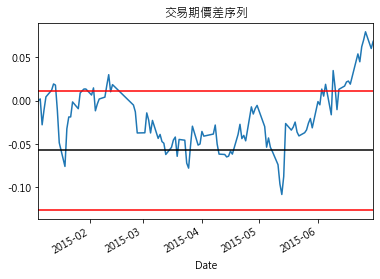

In [ ]:
TradSpread.plot()
plt.title('交易期價差序列')
plt.axhline(y=meanSSD_pair,color='black')
plt.axhline(y=thresholdUp,color='red')
plt.axhline(y=thresholdDown,color='red') 

In [ ]:
spreadf=KYEflog-beta*Hitronflog-alpha
mu=np.mean(spreadf)
sd=np.std(spreadf)
mu+1.2*sd
mu-1.2*sd

-0.03891813451928949

In [ ]:
CoSpreadT=np.log(KYEt)-beta*np.log(Hitront)-alpha
CoSpreadT.describe() 

count    116.000000
mean      -0.014032
std        0.030794
min       -0.094471
25%       -0.035892
50%       -0.017570
75%        0.006555
max        0.070554
Name: Close, dtype: float64

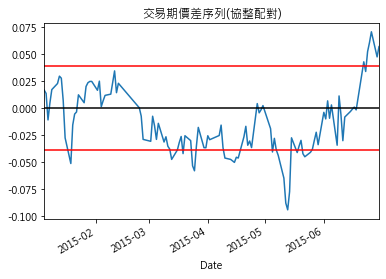

In [ ]:
CoSpreadT.plot()
plt.title('交易期價差序列(協整配對)')
plt.axhline(y=mu,color='black')
plt.axhline(y=mu+1.2*sd,color='red')
plt.axhline(y=mu-1.2*sd,color='red') 

In [ ]:
######PairTrading Class #############
class PairTrading:
    def SSD(self,priceX,priceY):
        if priceX is None or priceY is None:
            priant('缺少價格序列.')
        standardX=priceX/priceX[0]
        standardY=priceY/priceY[0]
        SSD=np.sum((standardY-standardX)**2)
        return(SSD)
    def SSDSpread(self,priceX,priceY):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        standardX=priceX/priceX[0]
        standardY=priceY/priceY[0]
        spread=standardY-standardX
        return(spread)
    def cointegration(self,priceX,priceY):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        priceX=np.log(priceX)
        priceY=np.log(priceY)
        results=sm.OLS(priceY,sm.add_constant(priceX)).fit()
        resid=results.resid
        adfSpread=ADF(resid)
        if adfSpread.pvalue>=0.05:
            print('''交易價格不具有協整關係.
            P-value of ADF test: %f
            Coefficients of regression:
            Intercept: %f
            Beta: %f
             ''' % (adfSpread.pvalue, results.params[0], results.params[1]))
            return(None)
        else:
            print('''交易價格具有協整關係.
            P-value of ADF test: %f
            Coefficients of regression:
            Intercept: %f
            Beta: %f
             ''' % (adfSpread.pvalue, results.params[0], results.params[1]))
            return(results.params[0], results.params[1])
    def CointegrationSpread(self,priceX,priceY,
                            formStart,formEnd,tradeStart,tradeEnd):
        if priceX is None or priceY is None:
            print('缺少價格序列.')
        formX=priceX[formStart:formEnd]
        formY=priceY[formStart:formEnd]
        tradeX=priceX[tradeStart:tradeEnd]
        tradeY=priceY[tradeStart:tradeEnd]
        coefficients=self.cointegration(formX,formY)
        if coefficients is None:
                print('未形成協整關係,無法配對.')
        else:
            spread=(np.log(tradeY)
            -coefficients[0]-coefficients[1]*np.log(tradeX))
            return(spread)
    def calBound(self,priceX,priceY,method,formStart,formEnd,width=1.5):
        formX=priceX[formStart:formEnd]
        formY=priceY[formStart:formEnd]
        if method=='SSD':
            spread=self.SSDSpread(formX,formY)            
            mu=np.mean(spread)
            sd=np.std(spread)
            UpperBound=mu+width*sd
            LowerBound=mu-width*sd
            return(UpperBound,LowerBound)
        elif method=='Cointegration':
            spread=self.CointegrationSpread(priceX,priceY,formStart,formEnd,
                 formStart,formEnd)
            mu=np.mean(spread)
            sd=np.std(spread)
            UpperBound=mu+width*sd
            LowerBound=mu-width*sd
            return(UpperBound,LowerBound)
        else:
            print('不存在該方法. 請選擇"SSD"或是"Cointegration".')

In [ ]:
formStart = '2014-01-01'
formEnd = '2015-01-01'
tradeStart = '2015-01-01'
tradeEnd = '2015-06-30'

In [ ]:
priceA= Hitron.Close
priceB=KYE.Close
priceAf=priceA[formStart:formEnd]
priceBf=priceB[formStart:formEnd]
priceAt=priceA[tradeStart:tradeEnd]
priceBt=priceB[tradeStart:tradeEnd]

In [ ]:
pt=PairTrading()
SSD=pt.SSD(priceAf,priceBf)
SSD

1.3364442848421572

In [ ]:
SSDspread=pt.SSDSpread(priceAf,priceBf)
SSDspread.describe()
SSDspread.head()

Date
2014-01-02    0.000000
2014-01-03    0.021096
2014-01-06    0.033596
2014-01-07    0.018666
2014-01-08    0.016237
Name: Close, dtype: float64

In [ ]:
coefficients=pt.cointegration(priceAf,priceBf)
coefficients

交易價格具有協整關係.
            P-value of ADF test: 0.000001
            Coefficients of regression:
            Intercept: 0.148857
            Beta: 0.813755
             


(0.14885693760867308, 0.8137547011721911)

In [ ]:
alpha


0.14885693760867308

In [ ]:
beta

0.8137547011721911

In [ ]:
CoSpreadF=pt.CointegrationSpread(priceA,priceB,
             formStart,formEnd,formStart,formEnd)
CoSpreadF.head()


交易價格具有協整關係.
            P-value of ADF test: 0.000001
            Coefficients of regression:
            Intercept: 0.148857
            Beta: 0.813755
             


Date
2014-01-02    0.029188
2014-01-03    0.047983
2014-01-06    0.058349
2014-01-07    0.046629
2014-01-08    0.045294
Name: Close, dtype: float64

In [ ]:
CoSpreadTr=pt.CointegrationSpread(priceA,priceB,formStart,formEnd,
            tradeStart,tradeEnd)
CoSpreadTr.describe()

交易價格具有協整關係.
            P-value of ADF test: 0.000001
            Coefficients of regression:
            Intercept: 0.148857
            Beta: 0.813755
             


count    116.000000
mean      -0.014032
std        0.030794
min       -0.094471
25%       -0.035892
50%       -0.017570
75%        0.006555
max        0.070554
Name: Close, dtype: float64

In [ ]:
bound=pt.calBound(priceA,priceB,'Cointegration',
      formStart,formEnd,width=1.2)
bound

交易價格具有協整關係.
            P-value of ADF test: 0.000001
            Coefficients of regression:
            Intercept: 0.148857
            Beta: 0.813755
             


(0.03891813451928096, -0.03891813451928966)

In [ ]:
##########配對交易實測 ###############
mu=np.mean(CoSpreadF)
sd=np.std(CoSpreadF)

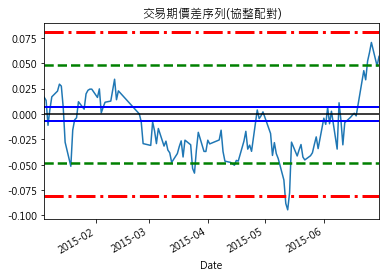

In [ ]:
#設定交易期
CoSpreadTr.plot()
plt.title('交易期價差序列(協整配對)')
plt.axhline(y=mu,color='black')
plt.axhline(y=mu+0.2*sd,color='blue',ls='-',lw=2)
plt.axhline(y=mu-0.2*sd,color='blue',ls='-',lw=2)
plt.axhline(y=mu+1.5*sd,color='green',ls='--',lw=2.5)
plt.axhline(y=mu-1.5*sd,color='green',ls='--',lw=2.5)
plt.axhline(y=mu+2.5*sd,color='red',ls='-.',lw=3) 
plt.axhline(y=mu-2.5*sd,color='red',ls='-.',lw=3) 

In [ ]:
level=(float('-inf'),mu-2.5*sd,
    mu-1.5*sd,mu-0.2*sd,
    mu+0.2*sd,mu+1.5*sd,
    mu+2.5*sd,
    float('inf'))

In [ ]:
prcLevel=pd.cut(CoSpreadTr,level,labels=False)-3
prcLevel.head() 

Date
2015-01-05    1
2015-01-06    1
2015-01-07   -1
2015-01-08    0
2015-01-09    1
Name: Close, dtype: int64

In [ ]:
#模擬交易
def TradeSig(prcLevel):
    n=len(prcLevel)
    signal=np.zeros(n)
    for i in range(1,n):
        if prcLevel[i-1]==1 and prcLevel[i]==2:
            signal[i]=-2
        elif prcLevel[i-1]==1 and prcLevel[i]==0:
            signal[i]=2
        elif prcLevel[i-1]==2 and prcLevel[i]==3:
            signal[i]=3
        elif prcLevel[i-1]==-1 and prcLevel[i]==-2:
            signal[i]=1
        elif prcLevel[i-1]==-1 and prcLevel[i]==0:
            signal[i]=-1
        elif prcLevel[i-1]==-2 and prcLevel[i]==-3:
            signal[i]=-3
    return(signal)

In [ ]:
signal=TradeSig(prcLevel)
print(signal)

[ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  2.  0.  0.
  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0. -1.
  0.  0.  0.  0.  0.  0.  0.  0.  1. -3.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.  2.  0.  0. -1.  0.  0.
  0.  0.  0. -2.  0.  0.  0. -2.]


In [ ]:
position=[signal[0]]
ns=len(signal)

In [ ]:
ns

116

In [ ]:
for i in range(1,ns):
    position.append(position[-1])
    if signal[i]==1:
        position[i]=1
    elif signal[i]==-2:
        position[i]=-1
    elif signal[i]==-1 and position[i-1]==1:
        position[i]=0
    elif signal[i]==2 and position[i-1]==-1:
        position[i]=0
    elif signal[i]==3:
        position[i]=0
    elif signal[i]==-3:
        position[i]=0

In [ ]:
position=pd.Series(position,index=CoSpreadT.index)

position.tail() 


Date
2015-06-24   -1.0
2015-06-25   -1.0
2015-06-26   -1.0
2015-06-29   -1.0
2015-06-30   -1.0
dtype: float64

In [ ]:
def TradeSim(priceX,priceY,position):
    n=len(position)
    shareY=10000*position
    shareX=[(-beta)*shareY[0]*priceY[0]/priceX[0]]
    cash=[10000]
    for i in range(1,n):
        shareX.append(shareX[i-1])
        cash.append(cash[i-1])
        if position[i-1]==0 and position[i]==1:
            shareX[i]=(-beta)*shareY[i]*priceY[i]/priceX[i]
            cash[i]=cash[i-1]-(shareY[i]*priceY[i]+shareX[i]*priceX[i])
        elif position[i-1]==0 and position[i]==-1:
            shareX[i]=(-beta)*shareY[i]*priceY[i]/priceX[i]
            cash[i]=cash[i-1]-(shareY[i]*priceY[i]+shareX[i]*priceX[i])
        elif position[i-1]==1 and position[i]==0:
            shareX[i]=0
            cash[i]=cash[i-1]+(shareY[i-1]*priceY[i]+shareX[i-1]*priceX[i])
        elif position[i-1]==-1 and position[i]==0:
            shareX[i]=0
            cash[i]=cash[i-1]+(shareY[i-1]*priceY[i]+shareX[i-1]*priceX[i])
    cash = pd.Series(cash,index=position.index)
    shareY=pd.Series(shareY,index=position.index)
    shareX=pd.Series(shareX,index=position.index)
    asset=cash+shareY*priceY+shareX*priceX
    account=pd.DataFrame({'Position':position,'ShareY':shareY,'ShareX':shareX,'Cash':cash,'Asset':asset})
    return(account)


In [ ]:
account1=TradeSim(Hitront,KYEt,position)
account1.tail() 
account1.ix[-1,'Asset']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


17885.817676597406

Text(0, 0.5, 'asset')

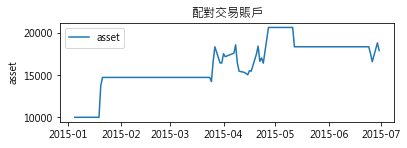

In [ ]:
plt.subplot(211)
plt.plot(account1.Asset,label='asset')
plt.title('配對交易賬戶') 
plt.legend()
plt.ylabel('asset')

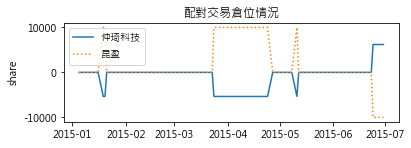

In [ ]:
plt.subplot(212)
plt.plot(account1.ShareX,label='仲琦科技')
plt.plot(account1.ShareY,':',label='昆盈')
plt.ylabel('share')
plt.title('配對交易倉位情況')
plt.legend()
plt.show()